In [2]:
%matplotlib inline
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets, linear_model, utils, preprocessing, model_selection
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
import pandas as pd
from pandas import DataFrame
import numpy as np
import scipy as sp
from scipy import stats
from ipywidgets import widgets

In [4]:
Company_Data = pd.read_excel('COMPANY_DATA.xlsx')   # need to remove the password before unload the file
Company_Data.head()

,state_county_fips,id,weight1,col1,col3,col4,col5,col6,col7,col8,...,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28
0,1001,0,22,15.58,1.82,12.47,20.199,83770.04,21.25,25.49,...,1.17,0.83,20.199,23534.09,0.61,0.61,9.243,12810.16,0.10,0.10
1,1001,1,125,15.58,13.54,13.57,111.467,510522.29,22.88,25.76,...,1.05,0.95,44.548,51904.70,0.23,0.22,59.035,62194.05,0.35,0.24
2,1001,2,70,15.58,0.00,10.55,66.699,335401.27,11.15,13.45,...,0.58,0.56,24.840,28941.57,0.26,0.15,32.917,45623.42,0.46,0.29
3,1001,3,46,15.58,6.05,9.77,39.944,218625.25,16.18,20.25,...,1.17,0.92,34.205,39854.46,0.65,0.53,11.572,16038.28,0.31,0.15
4,1001,4,7,15.58,0.98,9.72,6.027,20930.97,11.00,15.94,...,1.40,0.83,0.385,448.52,0.31,0.16,3.089,4281.74,0.18,0.14


In [5]:
CENSUS_Data = pd.read_excel('CENSUS_DATA.xls', skiprows=[0,1,2])   
CENSUS_Data.head()

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound.1,90% CI Upper Bound.1,...,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,"Poverty Estimate, Age 0-4",90% CI Lower Bound.7,90% CI Upper Bound.7,"Poverty Percent, Age 0-4",90% CI Lower Bound.8,90% CI Upper Bound.8
0,0,0,US,United States,46153077,45878016,46428138,14.7,14.6,14.8,...,19.7,55775,55690,55860,4448211,4397105,4499317,22.8,22.5,23.1
1,1,0,AL,Alabama,875853,859781,891925,18.5,18.2,18.8,...,26.1,44833,44110,45556,84382,80530,88234,29.4,28.1,30.7
2,1,1,AL,Autauga County,6966,5673,8259,12.7,10.3,15.1,...,22.1,56580,51459,61701,.,.,.,.,.,.
3,1,3,AL,Baldwin County,25941,21665,30217,12.9,10.8,15,...,22,52387,49865,54909,.,.,.,.,.,.
4,1,5,AL,Barbour County,7380,6240,8520,32,27.1,36.9,...,51.7,31433,28622,34244,.,.,.,.,.,.


In [6]:
HEALTH_Data = pd.ExcelFile('HEALTH_DATA.xls')   
H_OFR= HEALTH_Data.parse('Outcomes & Factors Rankings')   # HealthData excel ,Outcomes Factors Rankings sheet
H_OFS= HEALTH_Data.parse('Outcomes & Factors SubRankings')   # HealthData excel ,Outcomes & Factors SubRankings
H_RMD= HEALTH_Data.parse('Ranked Measure Data')   # HealthData excel ,Ranked Measure Data
H_RMSY= HEALTH_Data.parse('Ranked Measure Sources & Years')   # HealthData excel ,Ranked Measure Sources & Years
H_AMD= HEALTH_Data.parse('Additional Measure Data')   # HealthData excel ,Additional Measure Data
H_AMSY= HEALTH_Data.parse('Addtl Measure Sources & Years')   # HealthData excel ,Addtl Measure Sources & Years


In [7]:
#Parsing H_OFR
H_OFR= HEALTH_Data.parse('Outcomes & Factors Rankings', header=[0,1])   # HealthData excel ,Outcomes Factors Rankings sheet

H_OFR.rename(columns={'Unnamed: 0_level_0':'State'}, inplace=True)   # rename column name
H_OFR.rename(columns={'Unnamed: 1_level_0':'County'}, inplace=True)   # rename column name
H_OFR.rename(columns={'Unnamed: 2_level_0':'Ranked'}, inplace=True)   # rename column name
#H_OFR.head()


In [8]:
#Parsing H_OFS
H_OFS= HEALTH_Data.parse('Outcomes & Factors SubRankings', header=[0,1])

H_OFS.rename(columns=({'Unnamed: 0_level_0':'State'}), inplace=True)  # rename column name
H_OFS.rename(columns=({'Unnamed: 1_level_0':'County'}), inplace=True)  # rename column name
H_OFS.rename(columns=({'Unnamed: 2_level_0':'Ranked'}), inplace=True)  # rename column name

#H_OFS.head()

In [9]:
#Parsing H_RMD
H_RMD= HEALTH_Data.parse('Ranked Measure Data', header=[0,1])

H_RMD.rename(columns=({'*Due to data limitations, data for Jasper and Newton counties in Missouri were \
averaged for primary care physicians':'Location'}), inplace=True)  # rename column name

H_RMD.head()

*Due to data limitations, data for Jasper and Newton counties in Missouri were averaged for primary care physicians Location  \
FIPS                                                                                                                   State   
1001                                                                                                                 Alabama   
1003                                                                                                                 Alabama   
1005                                                                                                                 Alabama   
1007                                                                                                                 Alabama   
1009                                                                                                                 Alabama   

*Due to data limitations, data for Jasper and Newton counties in Missouri were averaged for primary care physicians           \
FIPS                                                                                                                  County   
1001                                                                                                                 Autauga   
1003                                                                                                                 Baldwin   
1005                                                                                                                 Barbour   
1007                                                                                                                    Bibb   
1009                                                                                                                  Blount   

*Due to data limitations, data for Jasper and Newton counties in Missouri were averaged for primary care physicians Premature death  \
FIPS                                                                                                                       # Deaths   
1001                                                                                                                          830.0   
1003                                                                                                                         2573.0   
1005                                                                                                                          413.0   
1007                                                                                                                          407.0   
1009                                                                                                                          906.0   

*Due to data limitations, data for Jasper and Newton counties in Missouri were averaged for primary care physicians                                    \
FIPS                                                                                                                Years of Potential Life Lost Rate   
1001                                                                                                                                           9158.2   
1003                                                                                                                                           7393.9   
1005                                                                                                                                           8573.1   
1007                                                                                                                                          11766.1   
1009                                                                                                                                           9332.8   

*Due to data limitations, data for Jasper and Newton counties in Missouri were averaged for primary care physicians               \
FIPS                                                    

Calculation:
above this is loading data and parsing input tables

In [10]:
# CONSTRUCT One Big DATAFRAME

#groupby comapany data by county
DF_Company=pd.DataFrame(Company_Data.groupby('state_county_fips')['weight1'].mean())
#join county company Just score with H_RMD
DF_Company_H_RMD=DF_Company.join(H_RMD, how='left')
#set FIPS as index for CENSUS dataset
CENSUS_Data1=CENSUS_Data
CENSUS_Data1['state_county_fips']=CENSUS_Data1['State FIPS Code']*1000+CENSUS_Data1['County FIPS Code']
CENSUS_Data1=CENSUS_Data1.set_index('state_county_fips')
#join Co. Just score, H_RMD with CENSUS data
DF_Co_H_RMD_Cens=DF_Company_H_RMD.join(CENSUS_Data1, how='left')
DF_Co_H_RMD_Cens.shape

/opt/conda/lib/python2.7/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


(3004, 187)

In [11]:
#Feature Matrix, Pick needed columns and rename columns for features matrix

col_name = ['YPL','FPH','PUD','MUD', 'LBW', 'PAS','PAO','PPI',
           'PED','AID','STI','PUI',
            'PHS', 'DMPR', 'MGS', 'HSGR', 'SCP', 'UEP',
            'PCP', 'IIIR', 'PSPH', 'VCR', 'IDR', 'APPM', 'PSHP', 'DAW', 'PLCDA',
            'PPA','PP17','PP517F','MHI']

col_name_dict = dict(YPL='Premature death_Years of Potential Life Lost Rate',
                 FPH='Percentage Fair/Poor health',
                 PUD='Physically Unhealthy Days',
                 MUD='Mentally Unhealthy Days', 
                 LBW='Percentage Low birthweight',
                 PAS='Percentage Adult Smokers',
                 PAO='Percentage Adult Obese',
                 PPI='Percentage Physical Inactivity',
                 PED='Percentage Excessive Drinking',
                 AID='Percentage Alcohol-Impaired Driving Deaths',
                 STI='Sexually Transmitted Infections_Chlamydia Rate',
                 PUI='Percentage Uninsured',
                 PHS='Preventable Hospital Stays Rate',
                 DMPR='Diabetes Monitoring, Percentage Receiving HbA1c',
                 MGS='Mammography Screening, Percentage Mammography',
                 HSGR='High School Graduation Rate',
                 SCP='Some College Percentage',
                 UEP='Unemployment Percentage',
                 PCP='Percentage Children in Poverty',
                 IIIR='Income Inequality, Income Ratio',
                 PSPH='Percentage Single-Parent Households',
                 VCR='Violent Crime Rate', 
                 IDR='Injury Death Rate',
                 APPM='Air Pollution - Particulate Matter, Average Daily PM2.5',
                 PSHP='Percentage Severe Housing Problems',
                 DAW='Driving Alone to Work, Percentage Drive Alone',
                 PLCDA='Percentage Long Commute - Driving Alone',
                    
                 PPA='Poverty Percent, All Ages',
                 PP17='Poverty Percent, Age 0-17',
                 PP517F='Poverty Percent, Age 5-17 in Families',
                 MHI='Median Household Income')

In [14]:
#Construct the clean column for all data
DF_Co_H_RMD_Cens_clean=DF_Co_H_RMD_Cens[['weight1']]
DF_Co_H_RMD_Cens_clean.columns=['JUST']

DF_Co_H_RMD_Cens_clean['State']=DF_Co_H_RMD_Cens[('Location', 'State')]
DF_Co_H_RMD_Cens_clean['County']=DF_Co_H_RMD_Cens[('Location', 'County')]

DF_Co_H_RMD_Cens_clean['YPL']=DF_Co_H_RMD_Cens[('Premature death', 'Years of Potential Life Lost Rate')]
DF_Co_H_RMD_Cens_clean['FPH']=DF_Co_H_RMD_Cens[('Poor or fair health', '% Fair/Poor')]
DF_Co_H_RMD_Cens_clean['PUD']=DF_Co_H_RMD_Cens[('Poor physical health days', 'Physically Unhealthy Days')]
DF_Co_H_RMD_Cens_clean['MUD']=DF_Co_H_RMD_Cens[('Poor mental health days', 'Mentally Unhealthy Days')]
DF_Co_H_RMD_Cens_clean['LBW']=DF_Co_H_RMD_Cens[('Low birthweight', '% LBW')]
DF_Co_H_RMD_Cens_clean['PAS']=DF_Co_H_RMD_Cens[('Adult smoking', '% Smokers')]
DF_Co_H_RMD_Cens_clean['PAO']=DF_Co_H_RMD_Cens[('Adult obesity', '% Obese')]
DF_Co_H_RMD_Cens_clean['PPI']=DF_Co_H_RMD_Cens[('Physical inactivity', '% Physically Inactive')]
DF_Co_H_RMD_Cens_clean['PED']=DF_Co_H_RMD_Cens[('Excessive drinking', '% Excessive Drinking')]
DF_Co_H_RMD_Cens_clean['AID']=DF_Co_H_RMD_Cens[('Alcohol-impaired driving deaths', '% Alcohol-Impaired')]
DF_Co_H_RMD_Cens_clean['STI']=DF_Co_H_RMD_Cens[('Sexually transmitted infections', 'Chlamydia Rate')]
DF_Co_H_RMD_Cens_clean['PUI']=DF_Co_H_RMD_Cens[('Uninsured', '% Uninsured')]
DF_Co_H_RMD_Cens_clean['PHS']=DF_Co_H_RMD_Cens[('Preventable hospital stays', 'Preventable Hosp. Rate')]
DF_Co_H_RMD_Cens_clean['DMPR']=DF_Co_H_RMD_Cens[('Diabetes monitoring', '% Receiving HbA1c')]
DF_Co_H_RMD_Cens_clean['MGS']=DF_Co_H_RMD_Cens[('Mammography screening', '% Mammography')]
DF_Co_H_RMD_Cens_clean['HSGR']=DF_Co_H_RMD_Cens[('High school graduation', 'Graduation Rate')]
DF_Co_H_RMD_Cens_clean['SCP']=DF_Co_H_RMD_Cens[('Some college', '% Some College')]
DF_Co_H_RMD_Cens_clean['UEP']=DF_Co_H_RMD_Cens[('Unemployment', '% Unemployed')]
DF_Co_H_RMD_Cens_clean['PCP']=DF_Co_H_RMD_Cens[('Children in poverty', '% Children in Poverty')]
DF_Co_H_RMD_Cens_clean['IIIR']=DF_Co_H_RMD_Cens[('Income inequality', 'Income Ratio')]
DF_Co_H_RMD_Cens_clean['PSPH']=DF_Co_H_RMD_Cens[('Children in single-parent households', '% Single-Parent Households')]
DF_Co_H_RMD_Cens_clean['VCR']=DF_Co_H_RMD_Cens[('Violent crime', 'Violent Crime Rate')] # has Null value
DF_Co_H_RMD_Cens_clean['IDR']=DF_Co_H_RMD_Cens[('Injury deaths', 'Injury Death Rate')]
DF_Co_H_RMD_Cens_clean['APPM']=DF_Co_H_RMD_Cens[('Air pollution - particulate matter', 'Average Daily PM2.5')]
DF_Co_H_RMD_Cens_clean['PSHP']=DF_Co_H_RMD_Cens[('Severe housing problems', '% Severe Housing Problems')]
DF_Co_H_RMD_Cens_clean['DAW']=DF_Co_H_RMD_Cens[('Driving alone to work', '% Drive Alone')]
DF_Co_H_RMD_Cens_clean['PLCDA']=DF_Co_H_RMD_Cens[(u'Long commute - driving alone', u'% Long Commute - Drives Alone')]

DF_Co_H_RMD_Cens_clean['PPA']=DF_Co_H_RMD_Cens['Poverty Percent, All Ages']
DF_Co_H_RMD_Cens_clean['PP17']=DF_Co_H_RMD_Cens['Poverty Percent, Age 0-17']
DF_Co_H_RMD_Cens_clean['PP517F']=DF_Co_H_RMD_Cens['Poverty Percent, Age 5-17 in Families']
DF_Co_H_RMD_Cens_clean['MHI']=DF_Co_H_RMD_Cens['Median Household Income']
    
DF_Co_H_RMD_Cens_clean.shape

/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

(3004, 34)

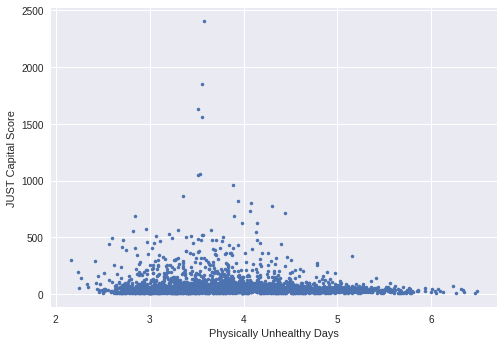

In [15]:
#column_down show case, This NOT useful in this study since we have to study state-by-state and not nationwide
#This is just for having some idea
from ipywidgets import widgets

def US_plot(column):
    plt.plot(DF_Co_H_RMD_Cens_clean[column], DF_Co_H_RMD_Cens_clean['JUST'], '.')
    plt.xlabel(col_name_dict[column])
    plt.ylabel('JUST Capital Score')

dropdown_values = {"{0}: {1}".format(k, v):k for k, v in col_name_dict.items()}

widgets.interact(US_plot, column=dropdown_values);

In [16]:
# Groupby the clean data and construct a new dataframe for summary of each state

DF_Co_H_RMD_Cens_clean_gr=DF_Co_H_RMD_Cens_clean.groupby('State')

DF_state_summary=DF_Co_H_RMD_Cens_clean_gr.mean()[['JUST']]
DF_state_summary.head()

,JUST
State,
Alabama,63.231938
Alaska,48.227386
Arizona,240.175774
Arkansas,51.495099
California,233.600287


In [17]:
DF_Co_H_RMD_Cens_clean_gr.get_group('District of Columbia')  # has only one-data

,JUST,State,County,YPL,FPH,PUD,MUD,LBW,PAS,PAO,...,VCR,IDR,APPM,PSHP,DAW,PLCDA,PPA,PP17,PP517F,MHI
state_county_fips,,,,,,,,,,,,,,,,,,,,,
11001,255.90625,District of Columbia,District of Columbia,7666.9,12.617528,3.217569,3.354195,10.037513,16.238415,22.4,...,1263.37628,59.047879,10.9,22.07472,33.742512,44.9,17.7,28.3,29.3,73115


In [18]:
#Linear Regression for one state without using customized function for regression(below)
name_state1='Texas'
AL_label=DF_Co_H_RMD_Cens_clean_gr['JUST'].get_group(name_state1)  # This is label
AL_matrix=DF_Co_H_RMD_Cens_clean_gr.get_group(name_state1).drop(['JUST','State','County'], axis=1) # feature matrix

#REPLACE NAN vith average of column
AL_matrix.fillna(AL_matrix.mean(), inplace=True)

if AL_matrix.isnull().sum().sum() > 0:
    AL_matrix.fillna(0, inplace=True)
#there are "NR" in data set means Not Readable when they collect data, needs to be filtered
#AL_matrix.replace(AL_matrix.mean(),'NR',axis=1, inplace=True)

#Shuffle Data for cross validation
np.random.seed(42)   
AL_Xraw, AL_y = utils.shuffle(AL_matrix, AL_label)

# train-test split
AL_X_train, AL_X_test, AL_y_train, AL_y_test = model_selection.train_test_split(AL_Xraw, AL_y, test_size=0.2)

#Scaling data
scaler = preprocessing.StandardScaler()
scaler.fit(AL_X_train)
AL_X_train_scaled = scaler.transform(AL_X_train)
AL_X_test_scaled = scaler.transform(AL_X_test)

# fit model to training data
linreg = linear_model.LinearRegression()
linreg.fit(AL_X_train_scaled, AL_y_train)

# Print outputs
#model parameters
#print linreg.coef_

#intercept
#print linreg.intercept_

#Error calculation: R^2
#in-sample error
print 'in-sample error (R^2): ', linreg.score(AL_X_train_scaled, AL_y_train)

#out-of-sample error
print 'out-of-sample error (R^2): ', linreg.score(AL_X_test_scaled, AL_y_test)


print ("prediction = " +
       "{0} +\n".format(linreg.intercept_) +
       " +\n".join(["{1} * {0}".format(n, f) for n, f in zip(col_name, linreg.coef_)]))

in-sample error (R^2):  0.500134482143
out-of-sample error (R^2):  0.367749420289
prediction = 73.8568258813 +
-11.3405842006 * YPL +
-15.5328368789 * FPH +
67.1837643475 * PUD +
-85.1558389618 * MUD +
9.94382937597 * LBW +
-13.1652559461 * PAS +
-20.2321531947 * PAO +
-16.0102115555 * PPI +
-5.54500062897 * PED +
12.2900823222 * AID +
1.05241224724 * STI +
15.8424973148 * PUI +
2.47690733691 * PHS +
-0.107473880489 * DMPR +
5.04931036119 * MGS +
-7.2858227 * HSGR +
11.1987412464 * SCP +
-8.8024612767 * UEP +
-12.6031878311 * PCP +
-3.01329613561 * IIIR +
9.33103526085 * PSPH +
17.4824561149 * VCR +
-1.20883782403 * IDR +
74.3786185613 * APPM +
12.8295861077 * PSHP +
3.45294768672 * DAW +
-27.5538982523 * PLCDA +
-18.667596323 * PPA +
-12.6031878311 * PP17 +
62.2342790258 * PP517F +
0.480005563296 * MHI


In [24]:
# Linear Regression and Ridge, RidgeCV and Lasso Regularization function 
#and Barchart function

def Reg_func(feature_matrix, label_vector,ridgeA,ridgeCVA,lossoA):
    
    #REPLACE NAN vith average of column
    feature_matrix.fillna(feature_matrix.mean(), inplace=True)
    if feature_matrix.isnull().sum().sum() > 0:  # consider with all data be NaN in one column
        feature_matrix.fillna(0, inplace=True)

    #Shuffle Data for cross validation
    np.random.seed(42)   
    S_Xraw, S_y = utils.shuffle(feature_matrix, label_vector)

    # train-test split
    S_X_train, S_X_test, S_y_train, S_y_test = model_selection.train_test_split(S_Xraw, S_y, test_size=0.2)

    #Scaling data
    scaler = preprocessing.StandardScaler()
    scaler.fit(S_X_train)
    S_X_train_scaled = scaler.transform(S_X_train)
    S_X_test_scaled = scaler.transform(S_X_test)

    # fit model to training data, Linear Regression
    linreg = linear_model.LinearRegression()
    linreg.fit(S_X_train_scaled, S_y_train)
    
    #Linear regression outputs
    l_c=linreg.coef_  
    l_i=linreg.intercept_
    l_R_sqrd_in=linreg.score(S_X_train_scaled, S_y_train)  #R squared in-sample error
    l_R_sqrd_out=linreg.score(S_X_test_scaled, S_y_test)  #R squared out-of-sample error
    
    #Ridge Regression Model, Regularization
    ridge = Ridge(alpha=ridgeA)   # 5.0
    ridge.fit(S_X_train_scaled, S_y_train)
    r_c=ridge.coef_  
    r_i=ridge.intercept_
    r_R_sqrd_in=ridge.score(S_X_train_scaled, S_y_train)  
    r_R_sqrd_out=ridge.score(S_X_test_scaled, S_y_test)  
    
    #RidgeCV Regression Model, Regularization
    ridgeCV = RidgeCV(alphas=ridgeCVA)  # (0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 3.5, 5.0, 7.5, 10.0)
    ridgeCV.fit(S_X_train_scaled, S_y_train)
    rCV_c=ridgeCV.coef_  
    rCV_i=ridge.intercept_
    rCV_R_sqrd_in=ridgeCV.score(S_X_train_scaled, S_y_train)  
    rCV_R_sqrd_out=ridgeCV.score(S_X_test_scaled, S_y_test)  
    
    #Lasso Regression Model, Regularization
    lasso = Lasso(alpha=lossoA)  #0.1
    lasso.fit(S_X_train_scaled, S_y_train)
    las_c=lasso.coef_  
    las_i=lasso.intercept_
    las_R_sqrd_in=lasso.score(S_X_train_scaled, S_y_train)  
    las_R_sqrd_out=lasso.score(S_X_test_scaled, S_y_test) 
    
    print 'Linear regression in-sample error (R^2):', l_R_sqrd_in
    print 'Linear regression out-of-sample error (R^2):', l_R_sqrd_out
    print 'Ridge regression in-sample error (R^2):', r_R_sqrd_in
    print 'Ridge regression out-of-sample error (R^2):', r_R_sqrd_out
    print 'RidgeCV regression in-sample error (R^2):', rCV_R_sqrd_in
    print 'RidgeCV regression out-of-sample error (R^2):', rCV_R_sqrd_out
    print 'Losso regression in-sample error (R^2):', las_R_sqrd_in
    print 'Losso regression out-of-sample error (R^2):', las_R_sqrd_out
    
    return l_R_sqrd_in, l_R_sqrd_out, l_i, l_c, r_R_sqrd_in, r_R_sqrd_out, r_i, r_c, \
           rCV_R_sqrd_in, rCV_R_sqrd_out, rCV_i, rCV_c, las_R_sqrd_in, las_R_sqrd_out, las_i, las_c



#print linear equation function or bar chart of coeffients
def eq_plt_print(inte,col_names, coef, plt_eq, col_name_dict, state):
    if plt_eq==0:
        print ("prediction = " +
           "{0} +\n".format(int) +
           " +\n".join(["{1} * {0}".format(n, f) for n, f in zip(col_names, coef)]))
    else:
        N = 31
        #men_means = coef

        ind = np.arange(N)  # the y locations for the groups
        width = 0.6      # the width of the bars

        fig, ax = plt.subplots(figsize=(10, 18), dpi=120)
        y_label=[col_name_dict[k]  for k in col_name if k in col_name_dict.keys()]

        ax.set_xlabel('Regression Coefficient', fontsize=16)

        ax.set_title('Public Features Correlation with JUST Score in %s' % state, fontsize=16)
        ax.set_yticks(ind + width/15)
        ax.set_yticklabels(y_label, fontsize=12)
        bar_plot = ax.barh(ind, coef, width, color='chocolate') #color='r'
    
    


In [21]:
DF_Co_H_RMD_Cens_clean_gr.groups.keys()  #list of states

[u'Mississippi',
 u'Oklahoma',
 u'Wyoming',
 u'Minnesota',
 u'Illinois',
 u'Georgia',
 u'Arkansas',
 u'New Mexico',
 u'Ohio',
 u'Indiana',
 u'Maryland',
 u'Louisiana',
 u'Idaho',
 u'Arizona',
 u'Iowa',
 u'Michigan',
 u'Kansas',
 u'Utah',
 u'Virginia',
 u'Oregon',
 u'Connecticut',
 u'Montana',
 u'California',
 u'Massachusetts',
 u'West Virginia',
 u'South Carolina',
 u'New Hampshire',
 u'Vermont',
 u'Delaware',
 u'North Dakota',
 u'Pennsylvania',
 u'Florida',
 u'Alaska',
 u'Kentucky',
 u'Hawaii',
 u'Nebraska',
 u'Missouri',
 u'Wisconsin',
 u'Alabama',
 u'New York',
 u'South Dakota',
 u'Colorado',
 u'New Jersey',
 u'Washington',
 u'North Carolina',
 u'Tennessee',
 u'District of Columbia',
 u'Texas',
 u'Nevada',
 u'Maine',
 u'Rhode Island']

Linear regression in-sample error (R^2): 0.500134482143
Linear regression out-of-sample error (R^2): 0.367749420289
Ridge regression in-sample error (R^2): 0.497852992344
Ridge regression out-of-sample error (R^2): 0.379883604965
RidgeCV regression in-sample error (R^2): 0.484825350039
RidgeCV regression out-of-sample error (R^2): 0.379788568075
Losso regression in-sample error (R^2): 0.499779755275
Losso regression out-of-sample error (R^2): 0.371513694424


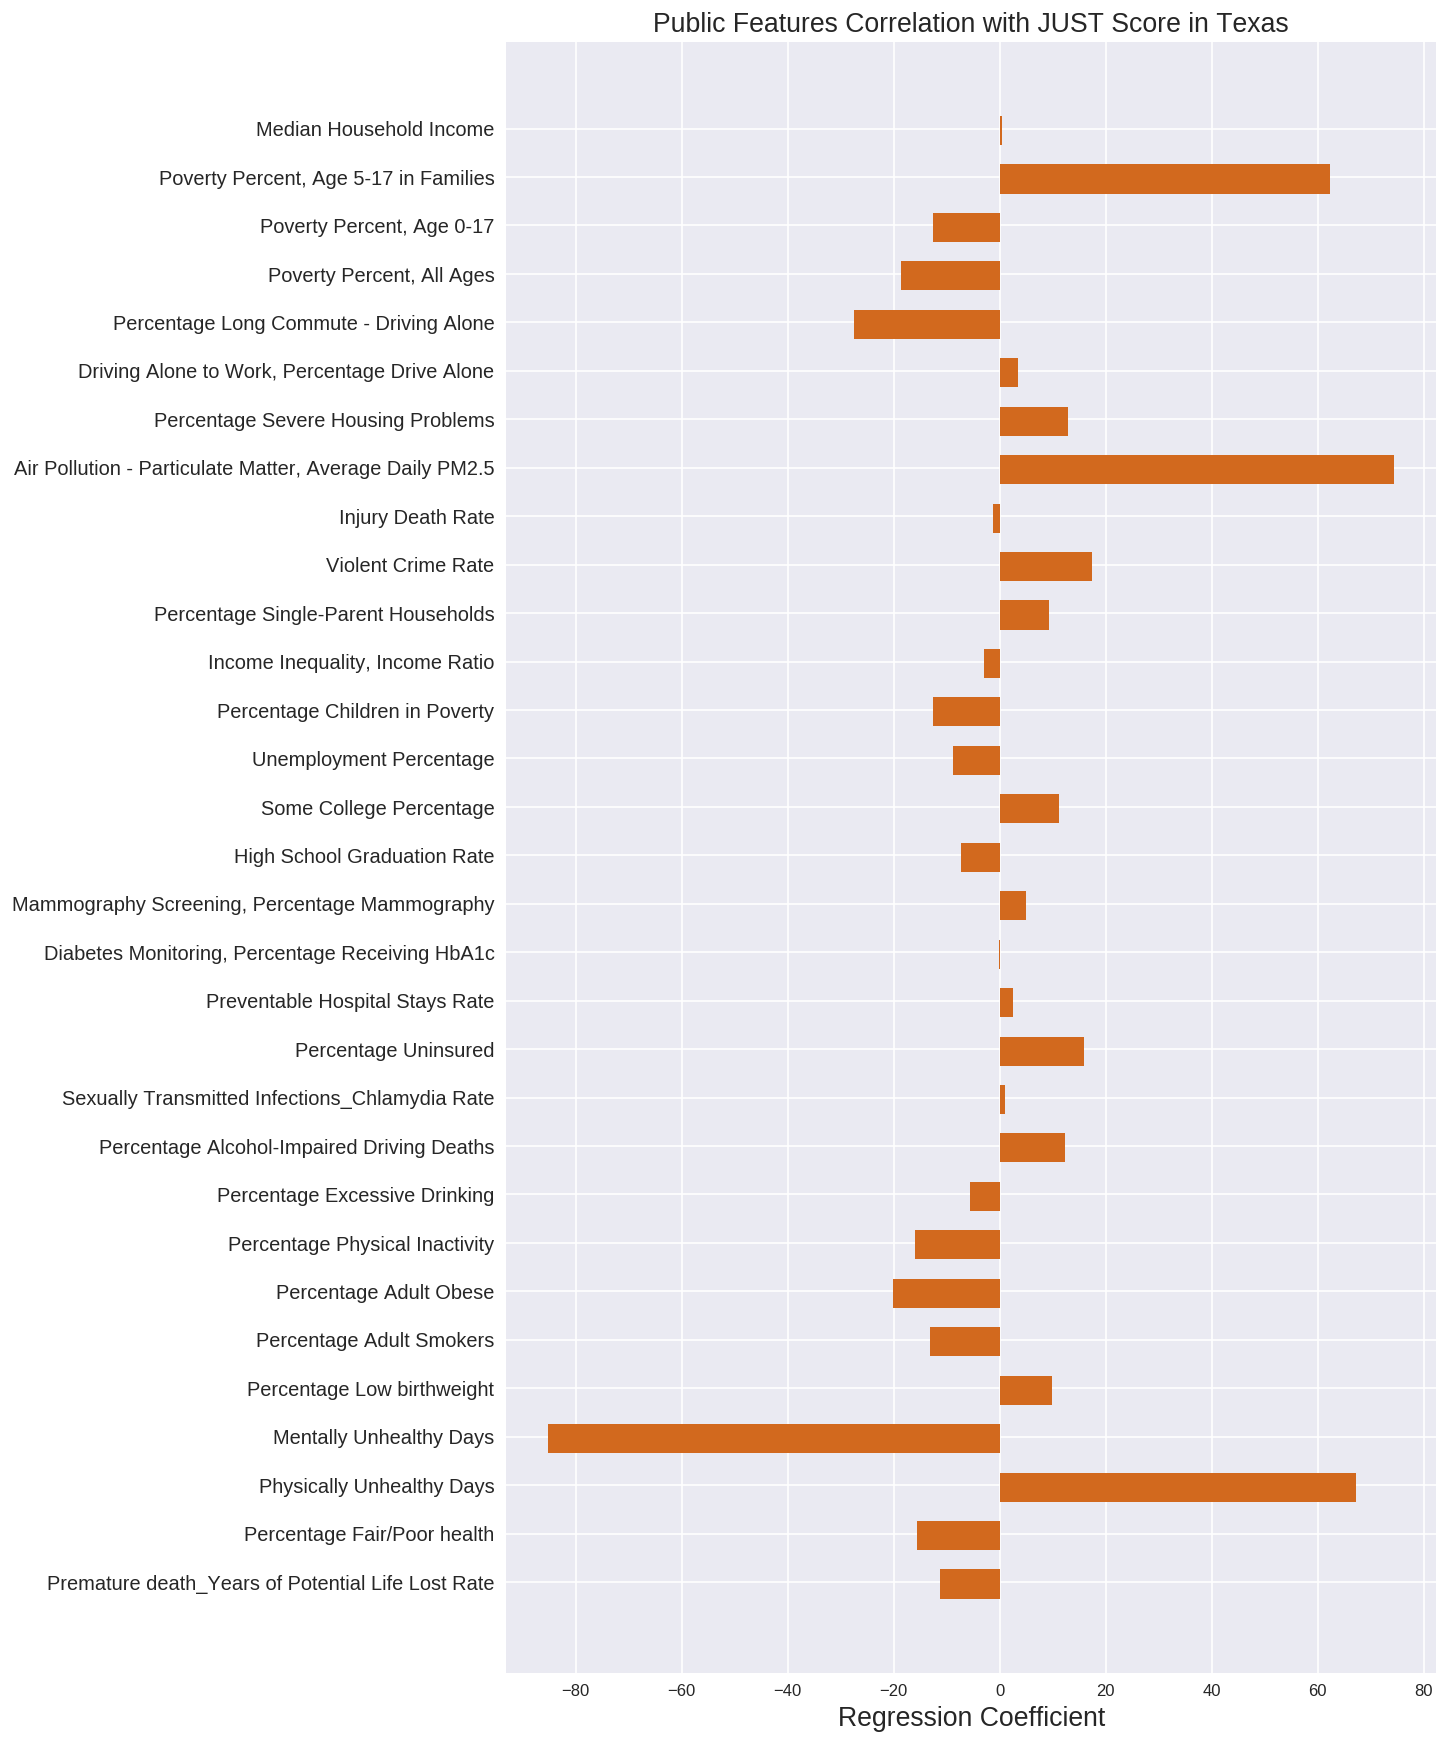

In [25]:
#Linear Regression
state_name='Texas'  #Note: 1st letter upper-case, the rest lower-case

state_label=DF_Co_H_RMD_Cens_clean_gr['JUST'].get_group(state_name)  # This is label
state_matrix=DF_Co_H_RMD_Cens_clean_gr.get_group(state_name).drop(['JUST','State','County'], axis=1) # feature matrix


#call function for regression
output=Reg_func(state_matrix, state_label,1.8, (5.0, 0.05, 0.1, 0.5, 1.0, 2.0, 3.5, 5.0, 7.5, 10.0),0.1) 
intercept=output[2]      #2 for linear_reg, 6 for Ridge_reg, 10 for RidgeCV_reg, 14 for Losso_reg
coefficients=output[3]   #3 for linear_reg, 7 for Ridge_reg, 11 for RidgeCV_reg, 15 for Losso_reg

eq_plt_print(intercept,col_name, coefficients, 1, col_name_dict, state_name)



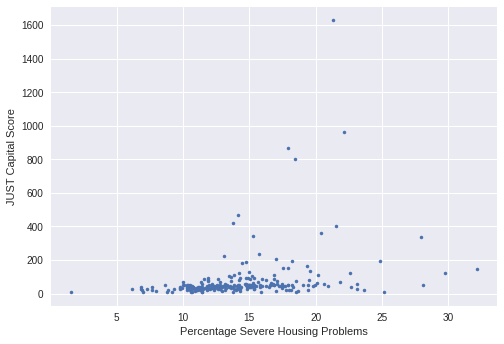

In [27]:
#For state information, need run cell above first
from ipywidgets import widgets

def State_plot(column):
    plt.plot(state_matrix[column], state_label, '.')
    plt.xlabel(col_name_dict[column])
    plt.ylabel('JUST Capital Score')

dropdown_values = {"{0}: {1}".format(k, v):k for k, v in col_name_dict.items()}

widgets.interact(State_plot, column=dropdown_values);

In [28]:
DF_state_summary['most_positive_correlated']=0
DF_state_summary['most_negative_correlated']=0

for x in DF_Co_H_RMD_Cens_clean_gr.groups.keys():
    if x=='District of Columbia':
        #print x,'break'
        continue
    else:
        x_label=DF_Co_H_RMD_Cens_clean_gr['JUST'].get_group(x)  # This is label
        x_matrix=DF_Co_H_RMD_Cens_clean_gr.get_group(x).drop(['JUST','State','County'], axis=1) # feature matrix

        #print x
        #call function for regression
        x_output=Reg_func(x_matrix, x_label,5.0, (0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 3.5, 5.0, 7.5, 10.0),0.1) 
        x_coefficients=x_output[3]   #3 for linear_reg, 7 for Ridge_reg, 11 for RidgeCV_reg, 15 for Losso_reg
    
        #print x,max(x_coefficients), min(x_coefficients)  
        DF_state_summary['most_positive_correlated'].loc[x]=  \
            col_name_dict[col_name[list(x_coefficients).index(max(x_coefficients))]]
        DF_state_summary['most_negative_correlated'].loc[x]=  \
            col_name_dict[col_name[list(x_coefficients).index(min(x_coefficients))]]
        #break
DF_state_summary.head()

Linear regression in-sample error (R^2): 0.768399709707
Linear regression out-of-sample error (R^2): -0.221704539303
Ridge regression in-sample error (R^2): 0.718878413202
Ridge regression out-of-sample error (R^2): 0.513136438046
RidgeCV regression in-sample error (R^2): 0.697205148571
RidgeCV regression out-of-sample error (R^2): 0.572226543483
Losso regression in-sample error (R^2): 0.760280826085
Losso regression out-of-sample error (R^2): 0.149936867935
Linear regression in-sample error (R^2): 0.713749617835
Linear regression out-of-sample error (R^2): -5.41177261736
Ridge regression in-sample error (R^2): 0.664379217789
Ridge regression out-of-sample error (R^2): -3.23173109885
RidgeCV regression in-sample error (R^2): 0.63183908116
RidgeCV regression out-of-sample error (R^2): -2.49843378441
Losso regression in-sample error (R^2): 0.71069121916
Losso regression out-of-sample error (R^2): -4.78104404405


/opt/conda/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Linear regression in-sample error (R^2): 1.0
Linear regression out-of-sample error (R^2): 0.139693590699
Ridge regression in-sample error (R^2): 0.809014716674
Ridge regression out-of-sample error (R^2): 0.616165386055
RidgeCV regression in-sample error (R^2): 0.698891948
RidgeCV regression out-of-sample error (R^2): 0.53010021704
Losso regression in-sample error (R^2): 0.996653960505
Losso regression out-of-sample error (R^2): -0.0221768943223
Linear regression in-sample error (R^2): 0.823743648962
Linear regression out-of-sample error (R^2): -2.703275042
Ridge regression in-sample error (R^2): 0.795883090181
Ridge regression out-of-sample error (R^2): -1.27712927851
RidgeCV regression in-sample error (R^2): 0.774927878038
RidgeCV regression out-of-sample error (R^2): -1.02097061787
Losso regression in-sample error (R^2): 0.822659037493
Losso regression out-of-sample error (R^2): -2.49908781795
Linear regression in-sample error (R^2): 0.886269259576
Linear regression out-of-sample err

/opt/conda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Linear regression in-sample error (R^2): 0.877740797674
Linear regression out-of-sample error (R^2): -0.485947566004
Ridge regression in-sample error (R^2): 0.858006014564
Ridge regression out-of-sample error (R^2): -0.461367351371
RidgeCV regression in-sample error (R^2): 0.847169195058
RidgeCV regression out-of-sample error (R^2): -0.320847138381
Losso regression in-sample error (R^2): 0.876872551522
Losso regression out-of-sample error (R^2): -0.514679680851
Linear regression in-sample error (R^2): 0.906639344052
Linear regression out-of-sample error (R^2): 0.177230134563
Ridge regression in-sample error (R^2): 0.886678636452
Ridge regression out-of-sample error (R^2): 0.610781277809
RidgeCV regression in-sample error (R^2): 0.876884390379
RidgeCV regression out-of-sample error (R^2): 0.659730594727
Losso regression in-sample error (R^2): 0.90441794998
Losso regression out-of-sample error (R^2): 0.361418172551
Linear regression in-sample error (R^2): 1.0
Linear regression out-of-sam

,JUST,most_positive_correlated,most_negative_correlated
State,,,
Alabama,63.231938,Some College Percentage,Physically Unhealthy Days
Alaska,48.227386,Violent Crime Rate,Percentage Adult Obese
Arizona,240.175774,Sexually Transmitted Infections_Chlamydia Rate,Percentage Low birthweight
Arkansas,51.495099,"Poverty Percent, Age 5-17 in Families","Poverty Percent, All Ages"
California,233.600287,"Poverty Percent, Age 5-17 in Families",Physically Unhealthy Days


In [29]:
DF_state_summary


,JUST,most_positive_correlated,most_negative_correlated
State,,,
Alabama,63.231938,Some College Percentage,Physically Unhealthy Days
Alaska,48.227386,Violent Crime Rate,Percentage Adult Obese
Arizona,240.175774,Sexually Transmitted Infections_Chlamydia Rate,Percentage Low birthweight
Arkansas,51.495099,"Poverty Percent, Age 5-17 in Families","Poverty Percent, All Ages"
California,233.600287,"Poverty Percent, Age 5-17 in Families",Physically Unhealthy Days
Colorado,68.486817,Mentally Unhealthy Days,"Poverty Percent, Age 5-17 in Families"
Connecticut,194.991616,Percentage Low birthweight,High School Graduation Rate
Delaware,171.655367,Percentage Fair/Poor health,Physically Unhealthy Days
District of Columbia,255.906250,0,0
